In [1]:
! pip3 install torch==1.13.0 torchvision==0.14.0 torchaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.2/890.2 MB 422.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 52.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 702.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 49.9 MB/s eta 0:00:0000:0100:01
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cpu
    Uninstalling torch-1.13.1+cpu:
      Successfully uninstalled t

In [2]:
import torch
import torchvision
from torchvision import transforms as T

In [3]:
!wget="B1.jpeg"


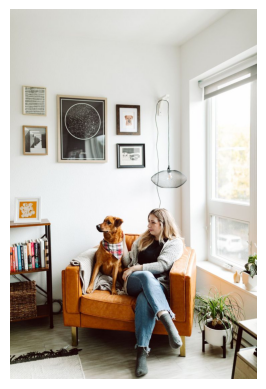

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

file_path = "B1.jpeg"
if os.path.exists(file_path):
    image = Image.open(file_path)
    
    # Display using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("File not found!")

In [7]:
ig=Image.open("B1.jpeg")


In [8]:
from torchvision import transforms as T
transform=T.ToTensor()
img=transform(ig)

In [10]:
# Load the pre-trained Faster R-CNN model using the new weights parameter
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()
import torch
with torch.no_grad():
    pred=model([img])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/jupyterlab/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [11]:
pred

[{'boxes': tensor([[2.1793e+02, 6.1329e+02, 3.5667e+02, 8.6381e+02],
          [3.1527e+02, 5.9645e+02, 5.1343e+02, 1.0735e+03],
          [5.4565e+02, 8.2638e+02, 6.9934e+02, 1.0177e+03],
          [6.8951e+02, 7.2862e+02, 7.3500e+02, 8.4029e+02],
          [6.7619e+02, 9.1993e+02, 7.3500e+02, 9.8411e+02],
          [8.9996e+01, 6.8325e+02, 1.0498e+02, 7.7162e+02],
          [1.5681e+02, 6.4658e+02, 5.5894e+02, 1.0184e+03],
          [7.2325e+01, 6.9146e+02, 8.6103e+01, 7.7386e+02],
          [1.0147e+02, 6.8326e+02, 1.1547e+02, 7.7280e+02],
          [5.1719e+01, 6.8964e+02, 6.5009e+01, 7.7772e+02],
          [6.2892e+01, 6.9238e+02, 7.4838e+01, 7.7581e+02],
          [3.3525e+02, 6.5511e+02, 4.5177e+02, 7.6456e+02],
          [6.6900e+02, 9.9067e+02, 7.3478e+02, 1.0941e+03],
          [6.6346e+02, 7.8083e+02, 6.8541e+02, 8.1727e+02],
          [6.2607e-01, 6.7880e+02, 1.1471e+02, 7.8643e+02],
          [6.8732e+02, 7.7961e+02, 7.3083e+02, 8.4397e+02],
          [3.9656e-01, 7.1112e+

In [12]:
bboxes = pred[0]["boxes"]   # Bounding boxes
labels = pred[0]["labels"]  # Class labels (correctly named)
scores = pred[0]["scores"] 

In [13]:
num=torch.argwhere(scores>0.9).shape[0]

In [14]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [16]:
import cv2
font=cv2.FONT_HERSHEY_SIMPLEX


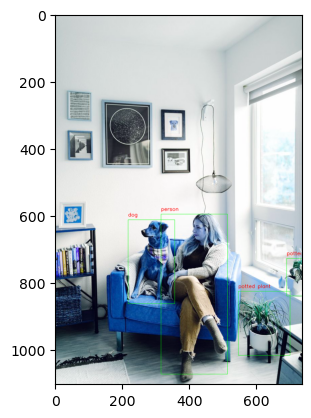

In [17]:
igg=cv2.imread("B1.jpeg")
for i in range(num):
    x1,y1,x2,y2=bboxes[i].numpy().astype("int")
    class_name=coco_names[labels.numpy()[i]-1]
    igg=cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    igg=cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)
    plt.imshow(igg)
    
